# finitediffx

In [1]:
import functools as ft

import finitediffx as fdx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as onp  # Not jax-traceable
import numpy.testing as npt
from jax.experimental import enable_x64

In [2]:
%matplotlib widget

In [3]:
jax.config.update("jax_enable_x64", True)

In [4]:
# lets first define a vector valued function F: R^3 -> R^3
# F = F1, F2
# F1 = x^2 + y^3
# F2 = x^4 + y^3
# F3 = 0
# F = [x**2 + y**3, x**4 + y**3, 0]

x, y, z = [jnp.linspace(0, 1, 100)] * 3
dx, dy, dz = x[1] - x[0], y[1] - y[0], z[1] - z[0]
X, Y, Z = jnp.meshgrid(x, y, z, indexing="ij")
F1 = X**2 + Y**3
F2 = X**4 + Y**3
F3 = jnp.zeros_like(F1)
F = jnp.stack([F1, F2, F3], axis=0)

In [5]:
# ∇.F : the divergence of F
divF = fdx.divergence(
    F,
    step_size=(dx, dy, dz),
    keepdims=False,
    accuracy=6,
    method="central",
)

In [6]:
# lets first define a vector valued function F: R^3 -> R^3
# F = F1, F2
# F1 = x^2 + y^3
# F2 = x^4 + y^3
# F3 = 0
# F = [x**2 + y**3, x**4 + y**3, 0]

x, y, z = [jnp.linspace(0, 1, 100)] * 3
dx, dy, dz = x[1] - x[0], y[1] - y[0], z[1] - z[0]
X, Y, Z = jnp.meshgrid(x, y, z, indexing="ij")
F1 = X**2 + Y**3
F2 = X**4 + Y**3
F3 = jnp.zeros_like(F1)
F = jnp.stack([F1, F2, F3], axis=0)

In [7]:
# ∂F1/∂x : differentiate F1 with respect to x (i.e axis=0)
dF1dx = fdx.difference(
    F1,
    axis=0,
    step_size=dx,
    accuracy=6,
    method="central",
)
dF1dx_exact = 2 * X
npt.assert_allclose(dF1dx, dF1dx_exact, atol=1e-7)

# ∂F2/∂y : differentiate F2 with respect to y (i.e axis=1)
dF2dy = fdx.difference(
    F2,
    axis=1,
    step_size=dy,
    accuracy=6,
    method="central",
)
dF2dy_exact = 3 * Y**2
npt.assert_allclose(dF2dy, dF2dy_exact, atol=1e-7)

# ∇.F : the divergence of F
divF = fdx.divergence(
    F,
    step_size=(dx, dy, dz),
    keepdims=False,
    accuracy=6,
    method="central",
)
divF_exact = 2 * X + 3 * Y**2
npt.assert_allclose(divF, divF_exact, atol=1e-7)

# ∇F1 : the gradient of F1
gradF1 = fdx.gradient(
    F1,
    step_size=(dx, dy, dz),
    accuracy=6,
    method="central",
)
gradF1_exact = jnp.stack([2 * X, 3 * Y**2, 0 * X], axis=0)
npt.assert_allclose(gradF1, gradF1_exact, atol=1e-7)

# ΔF1 : laplacian of F1
lapF1 = fdx.laplacian(
    F1,
    step_size=(dx, dy, dz),
    accuracy=6,
    method="central",
)
lapF1_exact = 2 + 6 * Y
npt.assert_allclose(lapF1, lapF1_exact, atol=1e-7)

# ∇xF : the curl of F
curlF = fdx.curl(
    F,
    step_size=(dx, dy, dz),
    accuracy=6,
    method="central",
)
curlF_exact = jnp.stack([F1 * 0, F1 * 0, 4 * X**3 - 3 * Y**2], axis=0)
npt.assert_allclose(curlF, curlF_exact, atol=1e-7)

# Jacobian of F
JF = fdx.jacobian(
    F,
    accuracy=4,
    step_size=(dx, dy, dz),
    method="central",
)
JF_exact = jnp.array(
    [
        [2 * X, 3 * Y**2, jnp.zeros_like(X)],
        [4 * X**3, 3 * Y**2, jnp.zeros_like(X)],
        [jnp.zeros_like(X), jnp.zeros_like(X), jnp.zeros_like(X)],
    ]
)
npt.assert_allclose(JF, JF_exact, atol=1e-7)

# Hessian of F1
HF1 = fdx.hessian(
    F1,
    accuracy=4,
    step_size=(dx, dy, dz),
    method="central",
)
HF1_exact = jnp.array(
    [
        [
            2 * jnp.ones_like(X),  # ∂2F1/∂x2
            0 * jnp.ones_like(X),  # ∂2F1/∂xy
            0 * jnp.ones_like(X),  # ∂2F1/∂xz
        ],
        [
            0 * jnp.ones_like(X),  # ∂2F1/∂yx
            6 * Y**2,  # ∂2F1/∂y2
            0 * jnp.ones_like(X),  # ∂2F1/∂yz
        ],
        [
            0 * jnp.ones_like(X),  # ∂2F1/∂zx
            0 * jnp.ones_like(X),  # ∂2F1/∂zy
            0 * jnp.ones_like(X),  # ∂2F1/∂z2
        ],
    ]
)
npt.assert_allclose(JF, JF_exact, atol=1e-7)

backprop training
Epoch 1000 loss 1.668e-04
Epoch 2000 loss 6.452e-05
Epoch 3000 loss 2.874e-05
Epoch 4000 loss 1.702e-05
Epoch 5000 loss 1.299e-05
Epoch 6000 loss 1.142e-05
Epoch 7000 loss 1.070e-05
Epoch 8000 loss 1.030e-05
Epoch 9000 loss 1.005e-05
Epoch 10000 loss 9.862e-06

finitediff training
Epoch 1000 loss 1.666e-04
Epoch 2000 loss 6.442e-05
Epoch 3000 loss 2.859e-05
Epoch 4000 loss 1.663e-05
Epoch 5000 loss 1.234e-05
Epoch 6000 loss 1.061e-05
Epoch 7000 loss 9.807e-06
Epoch 8000 loss 9.371e-06
Epoch 9000 loss 9.096e-06
Epoch 10000 loss 8.903e-06


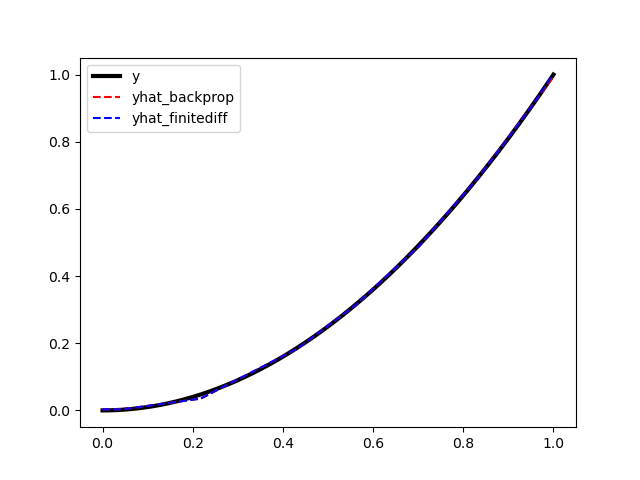

In [8]:
x = jnp.linspace(0, 1, 1_000)[:, None]
y = x**2

params = {
    "w1": jax.random.uniform(jax.random.PRNGKey(0), shape=[1, 20]),
    "b1": jnp.zeros([20]),
    "w2": jax.random.uniform(jax.random.PRNGKey(1), shape=[20, 1]),
    "b2": jnp.zeros([1]),
}


def forward(params: dict[str, jax.Array], x: jax.Array):
    x = x @ params["w1"] + params["b1"]
    x = jax.nn.relu(x)
    x = x @ params["w2"] + params["b2"]
    return x


def loss_func(params: dict[str, jax.Array], x: jax.Array, y: jax.Array):
    ypred = forward(params, x)
    return jnp.mean((ypred - y) ** 2)


@jax.jit
def backprop_train_step(
    params: dict[str, jax.Array],
    x: jax.Array,
    y: jax.Array,
    lr: float,
):
    loss, grads = jax.value_and_grad(loss_func)(params, x, y)
    params = {k: v - lr * grads[k] for k, v in params.items()}
    return params, loss


@jax.jit
def forward_train_step(
    params: dict[str, jax.Array],
    x: jax.Array,
    y: jax.Array,
    lr: float,
):
    loss, grads = fdx.value_and_fgrad(loss_func)(params, x, y)
    params = {k: v - lr * grads[k] for k, v in params.items()}
    return params, loss


def train(
    params: dict[str, jax.Array],
    x: jax.Array,
    y: jax.Array,
    lr: float,
    epochs: int,
    fd_grad: bool = False,
):
    train_step = forward_train_step if fd_grad else backprop_train_step

    for epoch in range(1, epochs + 1):
        params, loss = train_step(params, x, y, lr)
        if epoch % 1_000 == 0:
            print(f"Epoch {epoch} loss {loss:.3e}")
    return params


print("backprop training")
params_backprop = train(params, x, y, lr=1e-2, epochs=10_000, fd_grad=False)

print("\nfinitediff training")
params_forward = train(params, x, y, lr=1e-2, epochs=10_000, fd_grad=True)

yhat_backprop = forward(params_backprop, x)
yhat_forward = forward(params_forward, x)

plt.plot(x, y, "-k", label="y", linewidth=3)
plt.plot(x, yhat_backprop, "--r", label="yhat_backprop")
plt.plot(x, yhat_forward, "--b", label="yhat_finitediff")
plt.legend()
plt.show()

In [9]:
def numpy_func(x: onp.ndarray) -> onp.ndarray:
    return onp.power(x, 2)


try:
    jax.grad(numpy_func)(2.0)
except jax.errors.TracerArrayConversionError as e:
    print(e)


def wrap_pure_callback(func):
    @ft.wraps(func)
    def wrapper(*args, **kwargs):
        args = [jnp.asarray(arg) for arg in args]
        func_ = lambda *a, **k: func(*a, **k).astype(a[0].dtype)
        dtype_ = jax.ShapeDtypeStruct(
            jnp.broadcast_shapes(*[ai.shape for ai in args]),
            args[0].dtype,
        )
        return jax.pure_callback(func_, dtype_, *args, **kwargs, vectorized=True)

    return wrapper


@jax.jit  # -> can compile
@jax.grad  # -> can take gradient
@ft.partial(
    fdx.define_fdjvp,
    # automatically generate offsets
    offsets=fdx.Offset(accuracy=4),
    # manually set step size
    step_size=1e-3,
)
@wrap_pure_callback
def numpy_func(x: onp.ndarray) -> onp.ndarray:
    return onp.power(x, 2)


print(numpy_func(1.0))
# 1.9999794


@jax.jit  # -> can compile
@jax.grad  # -> can take gradient
@ft.partial(
    fdx.define_fdjvp,
    # provide the desired evaluation points for the finite difference stencil
    # in this case its centered finite difference (f(x-1) - f(x+1))/(2*step_size)
    offsets=jnp.array([1, -1]),
    # manually set step size
    step_size=1e-3,
)
@wrap_pure_callback
def numpy_func(x: onp.ndarray) -> onp.ndarray:
    return onp.power(x, 2)


print(numpy_func(1.0))
# 2.0000048

The numpy.ndarray conversion method __array__() was called on traced array with shape float64[].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError
1.9999999999998153
1.9999999999998863


In [10]:
with enable_x64():

    @fdx.fgrad
    @fdx.fgrad
    def np_rosenbach2_fdx_style_1(x, y):
        """Compute the Rosenbach function for two variables in numpy."""
        return onp.power(1 - x, 2) + 100 * onp.power(y - onp.power(x, 2), 2)

    @ft.partial(fdx.fgrad, derivative=2)
    def np2_rosenbach2_fdx_style2(x, y):
        """Compute the Rosenbach function for two variables."""
        return onp.power(1 - x, 2) + 100 * onp.power(y - onp.power(x, 2), 2)

    @jax.grad
    @jax.grad
    def jnp_rosenbach2(x, y):
        """Compute the Rosenbach function for two variables."""
        return jnp.power(1 - x, 2) + 100 * jnp.power(y - jnp.power(x, 2), 2)

    print(np_rosenbach2_fdx_style_1(1.0, 2.0))
    print(np2_rosenbach2_fdx_style2(1.0, 2.0))
    print(jnp_rosenbach2(1.0, 2.0))

402.0000951997936
402.0000000002219
402.0
